# Graphs encoder with subgraph isomorphism numbers

In [1]:
import torch

import numpy as np
import matplotlib.pyplot as plt
import itertools
from tqdm import tqdm

import networkx as nx 
from networkx.algorithms.isomorphism import ISMAGS, GraphMatcher

Encoding a graph into a vector in R^|F_set| given by (subgraphIso(F,G)) for F in Fset. 

Note that the standard ISMAGS has the order (graph,subgraph) in the arguments.  

In [2]:
class SubGraph:

    def __init__(self, G, F_set):
        self.graph = G
        self.test_graphs = F_set

    def counts(self,symmetry = True):
        pass

    def shom(self,F):
        # get iterator over subgraph homomorphisms F->G.  
        pass


In [3]:
def Simple_Encoder(G, F_set ,symmetry = True, format = 'Torch'):
    '''
    This function returns the subgraph isomorphism vector in R^|F_set| given by (subgraphIso(F,G)) 
    
    Inputs:
        G: Graph
        F_set: The set of test subgraphs
        symmetry (default = True) : counting embeddings F->G up to automorphisms of F or not. 
        format (default = Torch): desired output type
    Output:
        Enc(G): (|F_set|, ) vector of subgraph isomorphism counting
    '''
    Isom_G = (ISMAGS(G,F) for F in F_set)
    numIso_G = map(lambda x: len(list(x.find_isomorphisms(symmetry))), Isom_G)

    # match format 
    if format == 'Torch':
        return torch.tensor(list(numIso_G))
    if format == 'numpy':
        return np.array((list(numIso_G)))
    pass 

    # only works on python 3.10:
    # match format:
    #  case ['Torch']: torch.tensor(list(numIso_G))
    # case ['numpy']: np.array((list(numIso_G)))

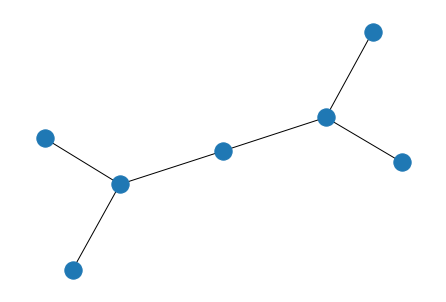

In [12]:
T = nx.balanced_tree(2,2)

nx.draw(T)

In [16]:
tree_2_gen = [nx.balanced_tree(m,n) for n,m in itertools.product(range(3), range(6))]

K = [nx.complete_graph(n) for n in range(10)]
#Simple_Encoder(nx.line_graph(K[2]),list(map(lambda x: nx.line_graph(x),tree_2_gen)))

ism = ISMAGS(K[4],T)

line_ism = ISMAGS(nx.line_graph(K[4]),nx.line_graph(T))

list(line_ism.find_isomorphisms())


[]